Relatório de estudos:
para ler dados, podemos utilizar o delimitedfiles e a função readdlm()
é mais fácil retirar 6 linhas que possuem atributos faltosos do que modificar todos os algoritmos para ignorar esses valores

Links uteis:
https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff
https://www.analyticsvidhya.com/blog/2017/10/comprehensive-tutorial-learn-data-science-julia-from-scratch/
https://nextjournal.com/leandromartinez98/tips-to-create-beautiful-publication-quality-plots-in-julia
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3668100/

# Informação detalhada dos atributos

|Atributo|Descrição                                                           |Tipo    |
|--------|:------------------------------------------------------------------:|-------:|
|Age     |idade em anos                                                       |real      |
|sex     | (1 = homem; 0 = mulher)                                             |categórica|
|cp      |tipo de dor no peito                                                |categórica|
|trestbps|pressão arterial em repouso (em mm Hg na admissão no hospital)      |real      |
|chol    |colestoral sérico em mg / dl                                        |real      |
|fbs     |(açúcar no sangue em jejum> 120 mg / dl) (1 = verdadeiro; 0 = falso)|categórica|
|restecg |resultados eletrocardiográficos em repouso                          |categórica|
|thalach |frequência cardíaca máxima atingida                                 |real      |
|exang   |angina induzida pelo exercício (1 = sim; 0 = não)                   |categórica|
|oldpeak |depressão do ST induzida por exercício em relação ao repouso        |real      |
|slope   |a inclinação do segmento ST do pico do exercício                    |categórica|
|ca      |número de vasos principais (0–3) coloridos por flourosopy           |categórica|
|thal    |3 = normal; 6 = defeito fixo; 7 = defeito reversível                |categórica|
|alvo    |doença cardiaca representada de 0 a 4                               |categórica|

In [177]:
using DataFrames, CSV, ColorSchemes, StatsPlots, Statistics

In [174]:
#buscando o arquivo e colocando o header no dataframe
df = DataFrame(CSV.File("processed.cleveland.csv"))
rename!(df, [:age, :sex, :cp, :trestbps, :chol, :fbs, :restecg, :thalach, :exang, :oldpeak, :slope, :ca, :thal, :target])
show(df, allcols=true)

302×14 DataFrame
│ Row │ age     │ sex     │ cp      │ trestbps │ chol    │ fbs     │ restecg │
│     │ Float64 │ Float64 │ Float64 │ Float64  │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼─────────┼─────────┼──────────┼─────────┼─────────┼─────────┤
│ 1   │ 67.0    │ 1.0     │ 4.0     │ 160.0    │ 286.0   │ 0.0     │ 2.0     │
│ 2   │ 67.0    │ 1.0     │ 4.0     │ 120.0    │ 229.0   │ 0.0     │ 2.0     │
│ 3   │ 37.0    │ 1.0     │ 3.0     │ 130.0    │ 250.0   │ 0.0     │ 0.0     │
│ 4   │ 41.0    │ 0.0     │ 2.0     │ 130.0    │ 204.0   │ 0.0     │ 2.0     │
│ 5   │ 56.0    │ 1.0     │ 2.0     │ 120.0    │ 236.0   │ 0.0     │ 0.0     │
│ 6   │ 62.0    │ 0.0     │ 4.0     │ 140.0    │ 268.0   │ 0.0     │ 2.0     │
│ 7   │ 57.0    │ 0.0     │ 4.0     │ 120.0    │ 354.0   │ 0.0     │ 0.0     │
│ 8   │ 63.0    │ 1.0     │ 4.0     │ 130.0    │ 254.0   │ 0.0     │ 2.0     │
│ 9   │ 53.0    │ 1.0     │ 4.0     │ 140.0    │ 203.0   │ 1.0     │ 2.0     │
│ 10  │ 57.0    │ 1.0     │ 4.0    

## Tratando os dados
como pode ser visto na célula anterior, possuímos alguns ruídos em nosso dataframe que precisam ser resolvidos antes de darmos continuidade a análise dos dados. Como possuímos apenas 1.9% dos dados com missing values, a melhor opção é remover essas instâncias da análise

In [192]:
#limpando os dados

#permitindo missing data no df
allowmissing!(df)

#substituindo todos os dados faltosos "?" por missing values
df .= ifelse.(df .=="?", missing, df)

#removendo as linhas com missing values
dropmissing!(df)

#transformando as duas colunas em float64
df.ca = parse.(Float64, df.ca)
df.thal = parse.(Float64, df.thal);

## Estatística dos atributos do dataset

In [81]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing,DataType
1,age,54.5135,29.0,56.0,77.0,,,Float64
2,sex,0.675676,0.0,1.0,1.0,,,Float64
3,cp,3.16554,1.0,3.0,4.0,,,Float64
4,trestbps,131.649,94.0,130.0,200.0,,,Float64
5,chol,247.399,126.0,243.0,564.0,,,Float64
6,fbs,0.141892,0.0,0.0,1.0,,,Float64
7,restecg,0.993243,0.0,1.0,2.0,,,Float64
8,thalach,149.598,71.0,153.0,202.0,,,Float64
9,exang,0.327703,0.0,0.0,1.0,,,Float64


## organizando os plots categóricos

In [149]:
#sex distribution
women = size(filter(row -> row.sex == 0,df))[1]
men = size(filter(row -> row.sex == 1, df))[1]

x = ["women", "men"]
y = [women, men]

p1 = pie(x, y, title = "Sex")

#cp distribution
cp1 = size(filter(row -> row.cp == 1, df))[1]
cp2 = size(filter(row -> row.cp == 2, df))[1]
cp3 = size(filter(row -> row.cp == 3, df))[1]
cp4 = size(filter(row -> row.cp == 4, df))[1]

x = ["typical angina", "atypical angina", "non-angimical pain", "asymptomatic"]
y = [cp1, cp2, cp3, cp4]

p2 = pie(x, y, title = "Chest Pain")

#fbs distribution
fbs1 = size(filter(row -> row.fbs == 0, df))[1]
fbs2 = size(filter(row -> row.fbs == 1, df))[1]

x = ["false", "true"]
y = [fbs1, fbs2]

p3 = pie(x, y, title = "Fasting blood sugar > 120mg/dl")

#exang distribution
ex1 = size(filter(row -> row.exang == 0, df))[1]
ex2 = size(filter(row -> row.exang == 1, df))[1]

x = ["false", "true"]
y = [ex1, ex2]

p4 = pie(x, y, title = "Exercise induced angina")

#slope distribution
slp1 = size(filter(row -> row.slope == 1, df))[1]
slp2 = size(filter(row -> row.slope == 2, df))[1]
slp3 = size(filter(row -> row.slope == 3, df))[1]

x = ["upsloping", "flat", "downsloping"]
y = [slp1, slp2, slp3]

p5 = pie(x, y, title = "The slope of the peak exercise ST segment")

#ca distribution
ca0 = size(filter(row -> row.ca == 0, df))[1]
ca1 = size(filter(row -> row.ca == 1, df))[1]
ca2 = size(filter(row -> row.ca == 2, df))[1]
ca3 = size(filter(row -> row.ca == 3, df))[1]

x = ["0", "1", "2", "3"]
y = [ca0, ca1, ca2, ca3]

p6 = pie(x, y, title = "number of major vessels colored by flourosopy")

#thal
thal3 = size(filter(row -> row.thal == 3, df))[1]
thal6 = size(filter(row -> row.thal == 6, df))[1]
thal7 = size(filter(row -> row.thal == 7, df))[1]

x = ["normal", "fixed defect", "reversable defect"]
y = [thal3, thal6, thal7]

p7 = pie(x, y, title = "thal")

#target distribution
num0 = size(filter(row -> row.target == 0, df))[1]
num1 = size(filter(row -> row.target == 1, df))[1]
num2 = size(filter(row -> row.target == 2, df))[1]
num3 = size(filter(row -> row.target == 3, df))[1]
num4 = size(filter(row -> row.target == 4, df))[1]

x = ["0", "1", "2", "3", "4"]
y = [num0, num1, num2, num3, num4]

p8 = pie(x, y, title = "target")

#restecg
res0 = size(filter(row -> row.restecg == 0, df))[1]
res1 = size(filter(row -> row.restecg == 1, df))[1]
res2 = size(filter(row -> row.restecg == 2, df))[1]

x = ["normal", "abnormality","left ventricular hypertrophy"]
y = [res0, res1, res2]

p9 = pie(x, y, title = "resting electrocardiographic results");

## organizando os plots reais

In [7]:
#age distribution
h1 = histogram(df.age, label = "age")
h2 = histogram(df.trestbps, label = "trestbps")
h3 = histogram(df.chol, label = "chol")
h4 = histogram(df.thalach, label = "thalach")
h5 = histogram(df.oldpeak, label = "oldpeak");

## Plots categóricos

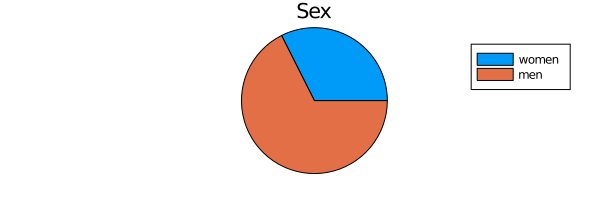

In [142]:
plot(p1, size = [600, 200])

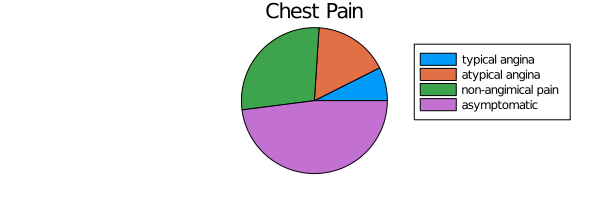

In [98]:
plot(p2, size = [600,200])

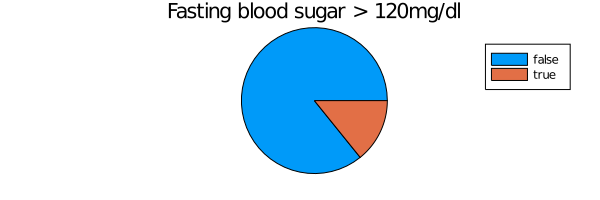

In [143]:
plot(p3, size = [600,200])

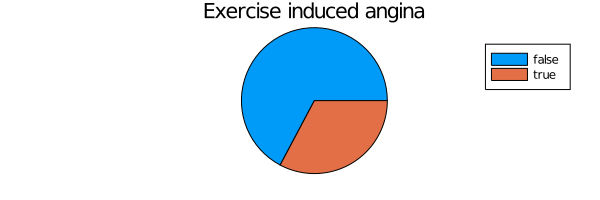

In [144]:
plot(p4, size = [600,200])

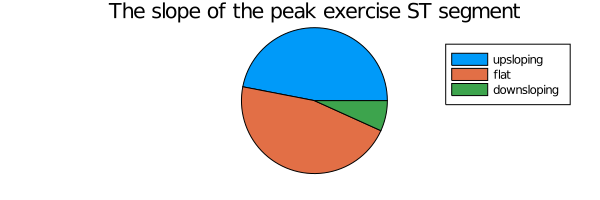

In [145]:
plot(p5, size = [600,200])

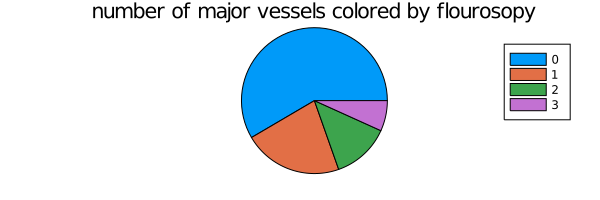

In [146]:
plot(p6, size = [600,200])

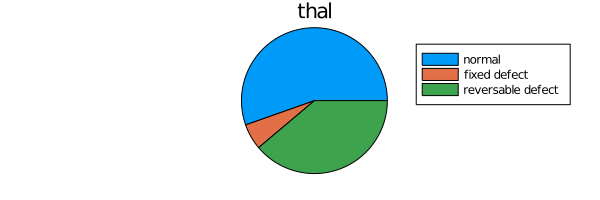

In [148]:
plot(p7, size = [600,200])

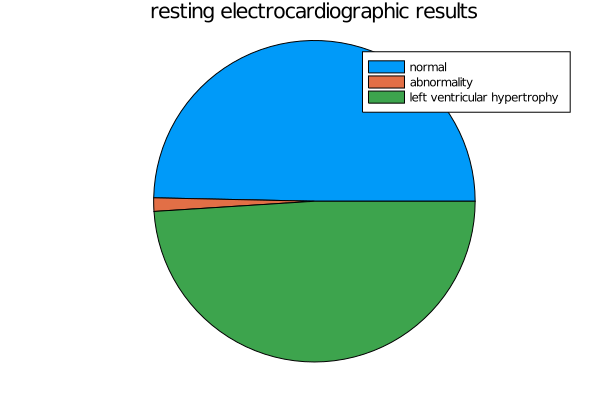

In [156]:
plot(p9, size = [600,400])

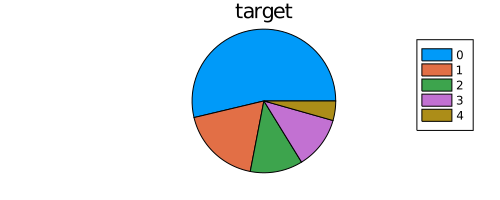

In [114]:
plot(p8, size = [500,200])

## Plot real

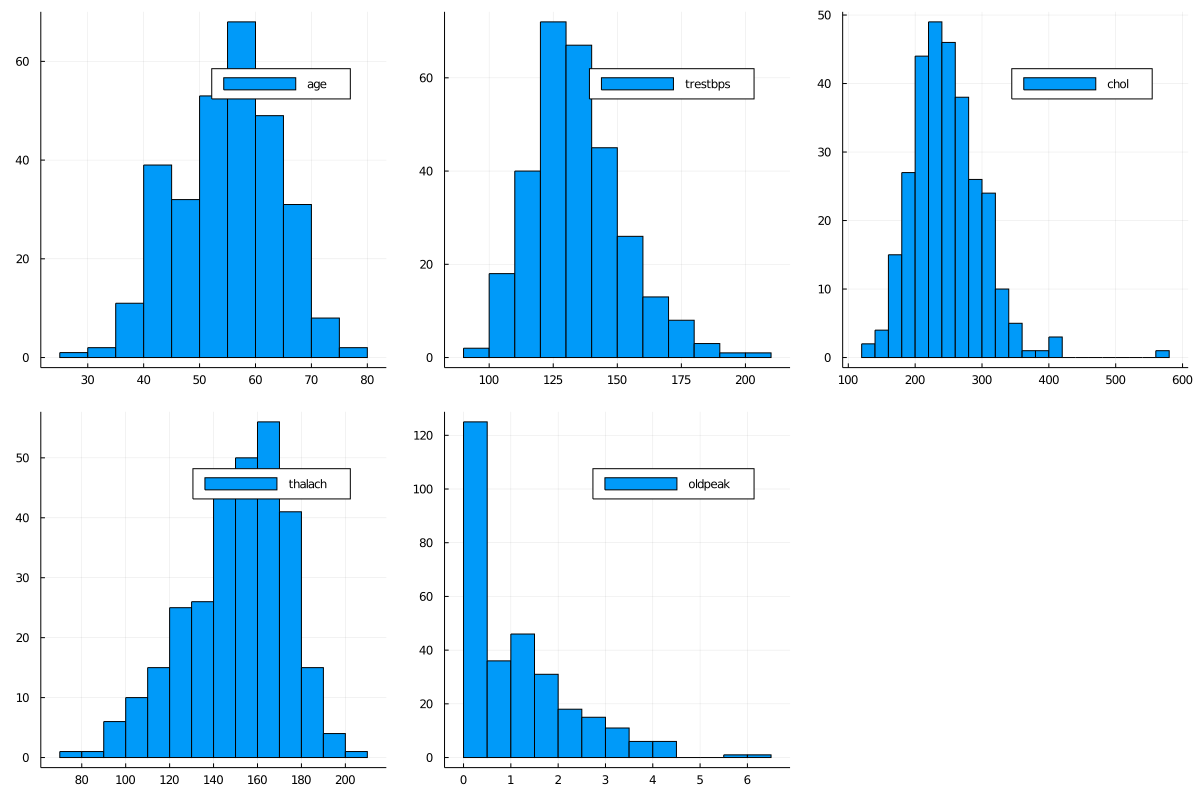

In [176]:
plot(h1, h2, h3, h4, h5, layout=5, size=[1200, 800])

## Calculando o balanceamento
Como pudemos ver no gráfico do target, nosso dataset é desbalanceado e segue as seguintes proporções:</br>

**sem a doença:** 53.7%

**grau 1 da doença:** 18.2%

**grau 2 da doença:** 11.8% 

**grau 3 da doença:** 11.8% 

**grau 4 da doença:** 04.3%

## Análise de Correlação


In [212]:
function correlation(df)
    matrixCor = zeros(14, 14)
    for i=1:size(df)[2]
        for j=1:size(df)[2]
            matrixCor[i,j] = cor(df[!, i], df[!, j])
        end
    end
    return matrixCor
end

matrix = correlation(df)
dfCorrelation = DataFrame(matrix)

rename!(dfCorrelation, [:age, :sex, :cp, :trestbps, :chol, :fbs, :restecg, :thalach, :exang, :oldpeak, :slope, :ca, :thal, :target])

show(dfCorrelation, allcols=true)

HCorrelation = filter( dfCorrelation)

14×14 DataFrame
│ Row │ age        │ sex        │ cp         │ trestbps   │ chol        │
│     │ Float64    │ Float64    │ Float64    │ Float64    │ Float64     │
├─────┼────────────┼────────────┼────────────┼────────────┼─────────────┤
│ 1   │ 1.0        │ -0.0948021 │ 0.118743   │ 0.288805   │ 0.203846    │
│ 2   │ -0.0948021 │ 1.0        │ 0.0142724  │ -0.0682121 │ -0.197629   │
│ 3   │ 0.118743   │ 0.0142724  │ 1.0        │ -0.0315985 │ 0.0706061   │
│ 4   │ 0.288805   │ -0.0682121 │ -0.0315985 │ 1.0        │ 0.13238     │
│ 5   │ 0.203846   │ -0.197629  │ 0.0706061  │ 0.13238    │ 1.0         │
│ 6   │ 0.125821   │ 0.0335389  │ -0.040004  │ 0.176636   │ 0.0151318   │
│ 7   │ 0.147193   │ 0.0316183  │ 0.0722909  │ 0.147075   │ 0.166298    │
│ 8   │ -0.395204  │ -0.0605858 │ -0.342089  │ -0.0491989 │ -5.8237e-5  │
│ 9   │ 0.0989189  │ 0.145444   │ 0.375759   │ 0.0685779  │ 0.0587442   │
│ 10  │ 0.194405   │ 0.104357   │ 0.213564   │ 0.189078   │ 0.0396759   │
│ 11  │ 0.153807   │ 0

## Distribuição dos dados